## Instalación de dependencias

A continuación se instalará el toolbox **MM2Action** y las librerías necesarias cómo Pytorch y Decord para el procesamiento de vídeo.

In [ ]:
# Instalación de dependencias:
# Se usa cu111 porque Colab tiene CUDA 11.1
!pip install torch==1.9.0+cu111 torchvision==0.10.0+cu111 -f https://download.pytorch.org/whl/torch_stable.html

# Instalación mmcv-full para poder usar los operatdores CUDA 
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html

# Instalación de mmaction2 - se hizo un fork del repo original
!rm -rf mmaction2
!git clone https://github.com/JoseMiguelCh/mmaction2.git
#!git clone https://github.com/open-mmlab/mmaction2.git
%cd mmaction2

!pip install -e .

# Instalación de requerimientos completos
!pip install -r requirements/optional.txt
!pip install decord

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |█████████████                   | 834.1 MB 96.7 MB/s eta 0:00:13tcmalloc: large alloc 1147494400 bytes == 0x39b6a000 @  0x7f585d22d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████████████████▌               | 1055.7 MB 1.2 MB/s eta 0:14:06tcmalloc: large alloc 1434370048 bytes == 0x7e1c0000 @  0x7f585d22d615 0x592b76 0x4df71e 0x59afff 0x515655 0x549576 0x593fce 0x548ae9 0x51566f 0x549576 0x593fce 0x548ae9 0x5127f1 0x598e3b 0x511f68 0x598e3b 0x511f68 0x598e3b 0x511f68 0x4bc98a 0x532e76 0x594b72 0x515600 0x549576 0x593fce 0x548ae9 0x5127f1 0x549576 0x593fce 0x5118f8 0x593dd7
     |████

Verificación de versiones

In [ ]:
# Verificación de la versión nvcc 
!nvcc -V

# Verificación de la versión GCC 
!gcc --version

# Verificación de la instalación de Pytorch
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

# Verificación de la instalación de MMAction2 
import mmaction
print(mmaction.__version__)

# Verificación de la instalación de MMCV
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print(get_compiling_cuda_version())
print(get_compiler_version())

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Mon_Oct_12_20:09:46_PDT_2020
Cuda compilation tools, release 11.1, V11.1.105
Build cuda_11.1.TC455_06.29190527_0
gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

1.9.0+cu111 True
0.24.0
11.1
GCC 7.3


## Descarga y configuración del dataset

- Objetivo: brindar soporte al dataset: CustomRFW2000


Primero, se descarga el dataset transformado RFW-2000 (https://mega.nz/file/zrBhlZxQ#yJ1qS0bEHTurvnuWDnTCPPdhfaXnuAQkXiTEyjQQUTc) usando el servicio de tranferencia de archivos de Mega. Contiene 1600 videos con sus etiquetas cómo dataset de entrenamiento y otros 400  videos con sus etiquetas cómo dataset de test.

In [ ]:
# Descargar e instalar utilidades para descargar y descomprimir el dataset
!wget https://mega.nz/linux/MEGAsync/xUbuntu_18.04/amd64/megacmd-xUbuntu_18.04_amd64.deb
!sudo apt install libc-ares2 libcrypto++6 libmediainfo0v5 libzen0v5
!sudo apt --fix-broken install
!sudo dpkg -i megacmd-xUbuntu_18.04_amd64.deb

--2022-06-01 18:36:01--  https://mega.nz/linux/MEGAsync/xUbuntu_18.04/amd64/megacmd-xUbuntu_18.04_amd64.deb
Resolving mega.nz (mega.nz)... 31.216.144.5, 31.216.145.5, 2a0b:e46:1:145::5, ...
Connecting to mega.nz (mega.nz)|31.216.144.5|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7647126 (7.3M) [application/x-deb]
Saving to: ‘megacmd-xUbuntu_18.04_amd64.deb’

megacmd-xUbuntu_18. 100%[===================>]   7.29M  3.47MB/s    in 2.1s    

2022-06-01 18:36:04 (3.47 MB/s) - ‘megacmd-xUbuntu_18.04_amd64.deb’ saved [7647126/7647126]

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  libmms0 libtinyxml2-6
The following NEW packages will be installed:
  libc-ares2 libcrypto++6 libmediainfo0v5 libmms0 libtinyxml2-6 libzen0v5
0 u

In [ ]:
# Descarga y descomprime el dataset
!mega-get "https://mega.nz/file/ijBHgYSR#V2fuQgxr1be3uBbA9GcgVZg9Hu_m4XSfNu3chasKZDs" # Full
#!mega-get "https://mega.nz/file/mmYSBBaD#7uPcTDAm1Q4dPTAB1ieWxKINwsht5wh-P6bXfv7Hghg" # Tiny
!unzip CustomRWF2000.zip > /dev/null

In [ ]:
!unzip CustomRWF2000.zip > /dev/null

In [ ]:
# Borra el instalador de MEGA ya que no es más necesario
!rm megacmd-xUbuntu_18.04_amd64.deb
!rm -r CustomRWF2000.zip

In [ ]:
# Verificación de la estructura de archivos del dataset
!apt-get -q install tree
!tree CustomRWF2000

Reading package lists...
Building dependency tree...
Reading state information...
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 1s (37.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 155729 files and directories currently installed.)
Preparing to unpack .../tree_1.7.0-5_amd64.deb ...
Unpacking tree (1.7.0-5) ...
Setting up tree (1.7.0-5) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
CustomRWF2000
├── labels.txt
├── test
│   ├── 0Ow4cotKOuw_0.avi
│   ├── 0Ow4cotKOuw_1.avi
│   ├── 0Ow4cotKOuw_2.avi
│   ├── 0Ow4cotKOuw_3.avi
│   ├── 0Ow4cotK

In [ ]:
# Verificación del formato de anotación de etiquetas
!cat CustomRWF2000/train_label.txt

24E0xYYUz44_7.avi 1
PlHzsigAFas_1.avi 1
wetyh_1207.avi 1
eYeiNRTrxR.avi 1
T56HlypCEyU_2.avi 1
F7W6PQ3V3y8_1.avi 1
_q5Nwh4Z6ao_0.avi 1
BCVBVC_263.avi 1
4HH7yMU8y9A_1.avi 1
lmfaDmCCRoY_7.avi 1
zZzgwklkJy.avi 1
_6-B11R9FJM_1.avi 1
DC10fyQgNqo_0.avi 1
XjxCalhiFJ.avi 1
cBNVcBk3rjg_2.avi 1
qrWTk-2a13o_3.avi 1
gHcG_c1i4uE_0.avi 1
BCHEUgCKCh.avi 1
kLHNW0uRutY_0.avi 1
trhfd_1016.avi 1
dP20avzQAf8_0.avi 1
u1r8f71c_2.avi 1
NpznjZe7A2M_1.avi 1
bFIlYsZqkO.avi 1
erwyrhd_338.avi 1
Pe1uIhp4dAQ_4.avi 1
a7D2i0HTXGM_0.avi 1
ROiHwksPSrg_0.avi 1
HtbVjsRA_0.avi 1
EtRfZ2KP_3.avi 1
rfthfd_537.avi 1
asdasda_111.avi 1
LLo_TXIz5-g_0.avi 1
asdasda_110.avi 1
rfthfd_536.avi 1
EtRfZ2KP_2.avi 1
HtbVjsRA_1.avi 1
a7D2i0HTXGM_1.avi 1
YL-qwpTMjzk_2.avi 1
lI17Q0j3_0.avi 1
erwyrhd_339.avi 1
NpznjZe7A2M_0.avi 1
u1r8f71c_3.avi 1
trhfd_1017.avi 1
dP20avzQAf8_1.avi 1
kLHNW0uRutY_1.avi 1
_6-B11R9FJM_0.avi 1
NxtwlqSnLbY_4.avi 1
qrWTk-2a13o_2.avi 1
cBNVcBk3rjg_3.avi 1
DC10fyQgNqo_1.avi 1
lmfaDmCCRoY_6.avi 1
4HH7yMU8y9A_0.avi 1
Ek

## Descarga y configuración del modelo preentrenado


Descarga del checkpoint de TimesFormer para cada uno de los tipos de atención disponibles:


*   Tiempo - Espacio unido
*   Tiempo - Espacio dividido
*   Espacio sólo

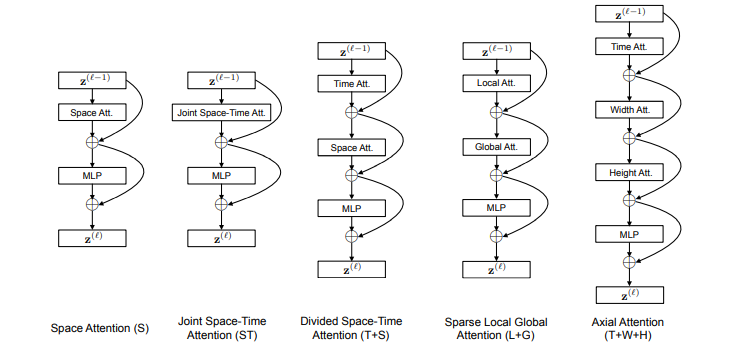



In [ ]:
!mkdir checkpoints
# divST
!wget -c https://download.openmmlab.com/mmaction/recognition/timesformer/timesformer_divST_8x32x1_15e_kinetics400_rgb/timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth \
      -O checkpoints/timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth
# joinST
!wget -c https://download.openmmlab.com/mmaction/recognition/timesformer/timesformer_jointST_8x32x1_15e_kinetics400_rgb/timesformer_jointST_8x32x1_15e_kinetics400_rgb-0d6e3984.pth \
      -O checkpoints/timesformer_jointST_8x32x1_15e_kinetics400_rgb-0d6e3984.pth
# spaceOnly
!wget -c https://download.openmmlab.com/mmaction/recognition/timesformer/timesformer_spaceOnly_8x32x1_15e_kinetics400_rgb/timesformer_spaceOnly_8x32x1_15e_kinetics400_rgb-0cf829cd.pth \
      -O checkpoints/timesformer_spaceOnly_8x32x1_15e_kinetics400_rgb-0cf829cd.pth

--2022-06-01 19:23:51--  https://download.openmmlab.com/mmaction/recognition/timesformer/timesformer_divST_8x32x1_15e_kinetics400_rgb/timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.18
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.18|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 486364592 (464M) [application/octet-stream]
Saving to: ‘checkpoints/timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth’

checkpoints/timesfo 100%[===================>] 463.83M  7.08MB/s    in 69s     

2022-06-01 19:25:01 (6.71 MB/s) - ‘checkpoints/timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth’ saved [486364592/486364592]

--2022-06-01 19:25:01--  https://download.openmmlab.com/mmaction/recognition/timesformer/timesformer_jointST_8x32x1_15e_kinetics400_rgb/timesformer_jointST_8x32x1_15e_kinetics400_rgb-0d6e3984.pth
Resolving download.openmmlab.com (download.open

### Modificar la configuración para cada tipo de atención
En el siguiente paso se modificará el archivo de configuración para el entrenamiento. Para acelerar el proceso se ajustará usando un reconocedor pre entrenado.

In [ ]:
# Importaciones necesarias

from mmcv import Config
from mmcv.runner import set_random_seed

### Atención T+S dividida

In [ ]:
cfg_divST = Config.fromfile('/content/mmaction2/configs/recognition/timesformer/timesformer_divST_8x32x1_15e_kinetics400_rgb.py')

# Modify dataset type and path
cfg_divST.dataset_type = 'VideoDataset'
cfg_divST.data_root = 'CustomRWF2000/train/'
cfg_divST.data_root_val = 'CustomRWF2000/test/'

cfg_divST.ann_file_train = 'CustomRWF2000/train_label.txt'
cfg_divST.ann_file_val = 'CustomRWF2000/test_label.txt'
cfg_divST.ann_file_test = 'CustomRWF2000/test_label.txt'

cfg_divST.data.train.type = 'VideoDataset'
cfg_divST.data.train.ann_file = 'CustomRWF2000/train_label.txt'
cfg_divST.data.train.data_prefix = 'CustomRWF2000/train/'

cfg_divST.data.test.type = 'VideoDataset'
cfg_divST.data.test.ann_file = 'CustomRWF2000/test_label.txt'
cfg_divST.data.test.data_prefix = 'CustomRWF2000/test/'

cfg_divST.data.val.type = 'VideoDataset'
cfg_divST.data.val.ann_file = 'CustomRWF2000/test_label.txt'
cfg_divST.data.val.data_prefix = 'CustomRWF2000/test/'

cfg_divST.evaluation.metrics=['mean_class_accuracy', 'top_k_accuracy']
cfg_divST.evaluation.interval = 5

# The flag is used to determine whether it is omnisource training
cfg_divST.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg_divST.model.cls_head.num_classes = 2
# We can use the pre-trained Timesformer model
cfg_divST.load_from = '/content/mmaction2/checkpoints/timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth'

# Set up working dir to save files and logs.
cfg_divST.work_dir = './work_dirs/timesformer_divST'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg_divST.data.videos_per_gpu = 1
# cfg_divST.optimizer.lr = cfg_divST.optimizer.lr / 8 
cfg_divST.total_epochs = 50


# We can set the checkpoint saving interval to reduce the storage cost
cfg_divST.checkpoint_config.interval = 5
# We can set the log print interval to reduce the the times of printing log
cfg_divST.log_config.interval = 5

# Set seed thus the results are more reproducible
cfg_divST.seed = 0
set_random_seed(0, deterministic=False)
cfg_divST.gpu_ids = range(1)

# Save the best
cfg_divST.evaluation.save_best='auto'

# We can initialize the logger for training and have a look
# at the final config used for training

print(f'Config:\n{cfg_divST.pretty_text}')

newConfig = open("/content/mmaction2/configs/recognition/timesformer/config_divST.py","w")

newConfig.writelines("_base_ = ['../../_base_/default_runtime.py']\n"+ cfg_divST.pretty_text)
newConfig.close() #to change file access modes

Config:
checkpoint_config = dict(interval=5)
log_config = dict(interval=5, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = '/content/mmaction2/checkpoints/timesformer_divST_8x32x1_15e_kinetics400_rgb-3f8e5d03.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='TimeSformer',
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth',
        num_frames=8,
        img_size=224,
        patch_size=16,
        embed_dims=768,
        in_channels=3,
        dropout_ratio=0.0,
        transformer_layers=None,
        attention_type='divided_space_time',
        norm_cfg=dict(type='LN', eps=1e-06)),
    cls_head=dict(type='TimeSformerHead', num_classes=2, in_channels=768),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
dataset_type = 'VideoDataset'
d

### Atención ST unida

In [ ]:
cfg_joinST = Config.fromfile('/content/mmaction2/configs/recognition/timesformer/timesformer_jointST_8x32x1_15e_kinetics400_rgb.py')

# Modify dataset type and path
cfg_joinST.dataset_type = 'VideoDataset'
cfg_joinST.data_root = 'CustomRWF2000/train/'
cfg_joinST.data_root_val = 'CustomRWF2000/test/'
cfg_joinST.ann_file_train = 'CustomRWF2000/train_label.txt'
cfg_joinST.ann_file_val = 'CustomRWF2000/test_label.txt'
cfg_joinST.ann_file_test = 'CustomRWF2000/test_label.txt'

cfg_joinST.data.test.type = 'VideoDataset'
cfg_joinST.data.test.ann_file = 'CustomRWF2000/test_label.txt'
cfg_joinST.data.test.data_prefix = 'CustomRWF2000/test/'

cfg_joinST.data.train.type = 'VideoDataset'
cfg_joinST.data.train.ann_file = 'CustomRWF2000/train_label.txt'
cfg_joinST.data.train.data_prefix = 'CustomRWF2000/train/'

cfg_joinST.data.val.type = 'VideoDataset'
cfg_joinST.data.val.ann_file = 'CustomRWF2000/test_label.txt'
cfg_joinST.data.val.data_prefix = 'CustomRWF2000/test/'

cfg_joinST.evaluation.metrics = ['mean_class_accuracy', 'top_k_accuracy']
# The flag is used to determine whether it is omnisource training
cfg_joinST.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg_joinST.model.cls_head.num_classes = 2
# We can use the pre-trained Timesformer model
cfg_joinST.load_from = '/content/mmaction2/checkpoints/timesformer_jointST_8x32x1_15e_kinetics400_rgb-0d6e3984.pth'

# Set up working dir to save files and logs.
cfg_joinST.work_dir = './work_dirs/timesformer_joinST'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg_joinST.data.videos_per_gpu = 1
cfg_joinST.optimizer.lr = cfg_joinST.optimizer.lr / 8 
cfg_joinST.total_epochs = 50


# We can set the checkpoint saving interval to reduce the storage cost
cfg_joinST.checkpoint_config.interval = 5
# We can set the log print interval to reduce the the times of printing log
cfg_joinST.log_config.interval = 5

# Set seed thus the results are more reproducible
cfg_joinST.seed = 0
set_random_seed(0, deterministic=False)
cfg_joinST.gpu_ids = range(1)

# Save the best
cfg_joinST.evaluation.save_best='auto'

# We can initialize the logger for training and have a look
# at the final config used for training

print(f'Config:\n{cfg_joinST.pretty_text}')

newConfig = open("/content/mmaction2/configs/recognition/timesformer/config_joinST.py","w")

newConfig.writelines("_base_ = ['../../_base_/default_runtime.py']\n"+ cfg_joinST.pretty_text)
newConfig.close() #to change file access modes

Config:
checkpoint_config = dict(interval=5)
log_config = dict(interval=5, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = '/content/mmaction2/checkpoints/timesformer_jointST_8x32x1_15e_kinetics400_rgb-0d6e3984.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='TimeSformer',
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth',
        num_frames=8,
        img_size=224,
        patch_size=16,
        embed_dims=768,
        in_channels=3,
        dropout_ratio=0.0,
        transformer_layers=None,
        attention_type='joint_space_time',
        norm_cfg=dict(type='LN', eps=1e-06)),
    cls_head=dict(type='TimeSformerHead', num_classes=2, in_channels=768),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
dataset_type = 'VideoDataset'
d

### Atención espacial

In [ ]:
cfg_spaceOnly = Config.fromfile('/content/mmaction2/configs/recognition/timesformer/timesformer_spaceOnly_8x32x1_15e_kinetics400_rgb.py')

# Modify dataset type and path
cfg_spaceOnly.dataset_type = 'VideoDataset'
cfg_spaceOnly.data_root = 'CustomRWF2000/train/'
cfg_spaceOnly.data_root_val = 'CustomRWF2000/test/'
cfg_spaceOnly.ann_file_train = 'CustomRWF2000/train_label.txt'
cfg_spaceOnly.ann_file_val = 'CustomRWF2000/test_label.txt'
cfg_spaceOnly.ann_file_test = 'CustomRWF2000/test_label.txt'

cfg_spaceOnly.data.test.type = 'VideoDataset'
cfg_spaceOnly.data.test.ann_file = 'CustomRWF2000/test_label.txt'
cfg_spaceOnly.data.test.data_prefix = 'CustomRWF2000/test/'

cfg_spaceOnly.data.train.type = 'VideoDataset'
cfg_spaceOnly.data.train.ann_file = 'CustomRWF2000/train_label.txt'
cfg_spaceOnly.data.train.data_prefix = 'CustomRWF2000/train/'

cfg_spaceOnly.data.val.type = 'VideoDataset'
cfg_spaceOnly.data.val.ann_file = 'CustomRWF2000/test_label.txt'
cfg_spaceOnly.data.val.data_prefix = 'CustomRWF2000/test/'

cfg_spaceOnly.evaluation.metrics = ['mean_class_accuracy', 'top_k_accuracy']
# The flag is used to determine whether it is omnisource training
cfg_spaceOnly.setdefault('omnisource', False)
# Modify num classes of the model in cls_head
cfg_spaceOnly.model.cls_head.num_classes = 2
# We can use the pre-trained Timesformer model
cfg_spaceOnly.load_from = '/content/mmaction2/checkpoints/timesformer_spaceOnly_8x32x1_15e_kinetics400_rgb-0cf829cd.pth'

# Set up working dir to save files and logs.
cfg_spaceOnly.work_dir = './work_dirs/timesformer_spaceOnly'

# The original learning rate (LR) is set for 8-GPU training.
# We divide it by 8 since we only use one GPU.
cfg_spaceOnly.data.videos_per_gpu = 1
cfg_spaceOnly.optimizer.lr = cfg_spaceOnly.optimizer.lr / 8 
cfg_spaceOnly.total_epochs = 50


# We can set the checkpoint saving interval to reduce the storage cost
cfg_spaceOnly.checkpoint_config.interval = 5
# We can set the log print interval to reduce the the times of printing log
cfg_spaceOnly.log_config.interval = 5

# Set seed thus the results are more reproducible
cfg_spaceOnly.seed = 0
set_random_seed(0, deterministic=False)
cfg_spaceOnly.gpu_ids = range(1)

# Save the best
cfg_spaceOnly.evaluation.save_best='auto'

# We can initialize the logger for training and have a look
# at the final config used for training

print(f'Config:\n{cfg_spaceOnly.pretty_text}')

newConfig = open("/content/mmaction2/configs/recognition/timesformer/config_spaceOnly.py","w")

newConfig.writelines("_base_ = ['../../_base_/default_runtime.py']\n"+ cfg_spaceOnly.pretty_text)
newConfig.close() #to change file access modes

Config:
checkpoint_config = dict(interval=5)
log_config = dict(interval=5, hooks=[dict(type='TextLoggerHook')])
dist_params = dict(backend='nccl')
log_level = 'INFO'
load_from = '/content/mmaction2/checkpoints/timesformer_spaceOnly_8x32x1_15e_kinetics400_rgb-0cf829cd.pth'
resume_from = None
workflow = [('train', 1)]
opencv_num_threads = 0
mp_start_method = 'fork'
model = dict(
    type='Recognizer3D',
    backbone=dict(
        type='TimeSformer',
        pretrained=
        'https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth',
        num_frames=8,
        img_size=224,
        patch_size=16,
        embed_dims=768,
        in_channels=3,
        dropout_ratio=0.0,
        transformer_layers=None,
        attention_type='space_only',
        norm_cfg=dict(type='LN', eps=1e-06)),
    cls_head=dict(type='TimeSformerHead', num_classes=2, in_channels=768),
    train_cfg=None,
    test_cfg=dict(average_clips='prob'))
dataset_type = 'VideoDataset'
data_

## Entrenamiento


In [ ]:
# Importaciones necesarias

import os.path as osp
from mmaction.datasets import build_dataset
from mmaction.models import build_model
from mmaction.apis import train_model
import mmcv

### Atención T+S dividida

In [ ]:
# Definición del dataset
datasets = [build_dataset(cfg_divST.data.train)]

# Definición del modelo
model_divST = build_model(cfg_divST.model, train_cfg=cfg_divST.get('train_cfg'), test_cfg=cfg_divST.get('test_cfg'))

# Crear el directorio de entrenamiento - work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg_divST.work_dir))
train_model(model_divST, datasets, cfg_divST, distributed=False, validate=True)

Output hidden; open in https://colab.research.google.com to view.

### Atención ST unida

In [ ]:
# Definición del dataset
datasets_joinST = [build_dataset(cfg_joinST.data.train)]

# Definición del modelo
model_joinST = build_model(cfg_joinST.model, train_cfg=cfg_joinST.get('train_cfg'), test_cfg=cfg_joinST.get('test_cfg'))

# Crear el directorio de entrenamiento - work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg_joinST.work_dir))
train_model(model_joinST, datasets_joinST, cfg_joinST, distributed=False, validate=True)

Output hidden; open in https://colab.research.google.com to view.

### Atención espacial

In [ ]:
datasets_spaceOnly = [build_dataset(cfg_spaceOnly.data.train)]
# Definición del modelo
model_spaceOnly = build_model(cfg_spaceOnly.model, train_cfg=cfg_spaceOnly.get('train_cfg'), test_cfg=cfg_spaceOnly.get('test_cfg'))

# Crear el directorio de entrenamiento - work_dir
mmcv.mkdir_or_exist(osp.abspath(cfg_spaceOnly.work_dir))
train_model(model_spaceOnly, datasets_spaceOnly, cfg_spaceOnly, distributed=False, validate=True)

Output hidden; open in https://colab.research.google.com to view.

## Test
Verificación de los resultados predichos por cada modelo

In [ ]:
from mmaction.apis import single_gpu_test
from mmaction.datasets import build_dataloader
from mmcv.parallel import MMDataParallel

# Build a test dataloader
dataset = build_dataset(cfg_divST.data.test, dict(test_mode=True))
data_loader = build_dataloader(
        dataset,
        videos_per_gpu=1,
        workers_per_gpu=cfg_divST.data.workers_per_gpu,
        dist=False,
        shuffle=False)

Atención T+S dividida

In [ ]:
model_divST = MMDataParallel(model_divST, device_ids=[0])
outputs_divST = single_gpu_test(model_divST, data_loader)

eval_config = cfg_divST.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs_divST, **eval_config)

for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 400/400, 4.6 task/s, elapsed: 86s, ETA:     0s
Evaluating mean_class_accuracy ...

mean_acc	0.8625

Evaluating top_k_accuracy ...

top1_acc	0.8625
top5_acc	1.0000
mean_class_accuracy: 0.8625
top1_acc: 0.8625
top5_acc: 1.0000


/content/mmaction2/mmaction/datasets/base.py:167: UserWarning: Option arguments for metrics has been changed to `metric_options`, See 'https://github.com/open-mmlab/mmaction2/pull/286' for more details
  'Option arguments for metrics has been changed to '


Atención T+S unida

In [ ]:
model_joinST = MMDataParallel(model_joinST, device_ids=[0])
outputs_joinST = single_gpu_test(model_joinST, data_loader)

eval_config = cfg_joinST.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs_joinST, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 400/400, 4.4 task/s, elapsed: 90s, ETA:     0s
Evaluating mean_class_accuracy ...

mean_acc	0.8575

Evaluating top_k_accuracy ...

top1_acc	0.8575
top5_acc	1.0000
mean_class_accuracy: 0.8575
top1_acc: 0.8575
top5_acc: 1.0000


/content/mmaction2/mmaction/datasets/base.py:167: UserWarning: Option arguments for metrics has been changed to `metric_options`, See 'https://github.com/open-mmlab/mmaction2/pull/286' for more details
  'Option arguments for metrics has been changed to '


Atención espacial

In [ ]:
model_spaceOnly = MMDataParallel(model_spaceOnly, device_ids=[0])
outputs_spaceOnly = single_gpu_test(model_spaceOnly, data_loader)

eval_config = cfg_spaceOnly.evaluation
eval_config.pop('interval')
eval_res = dataset.evaluate(outputs_spaceOnly, **eval_config)
for name, val in eval_res.items():
    print(f'{name}: {val:.04f}')

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 400/400, 7.0 task/s, elapsed: 58s, ETA:     0s
Evaluating mean_class_accuracy ...

mean_acc	0.8125

Evaluating top_k_accuracy ...

top1_acc	0.8125
top5_acc	1.0000
mean_class_accuracy: 0.8125
top1_acc: 0.8125
top5_acc: 1.0000


/content/mmaction2/mmaction/datasets/base.py:167: UserWarning: Option arguments for metrics has been changed to `metric_options`, See 'https://github.com/open-mmlab/mmaction2/pull/286' for more details
  'Option arguments for metrics has been changed to '


### Predicciones

In [ ]:
# Importaciones necesarias
from mmaction.apis import inference_recognizer, init_recognizer

In [ ]:
video = '/content/mmaction2/CustomRWF2000/train/ZnRk8nWJ548_0.avi'
label = '/content/mmaction2/CustomRWF2000/labels.txt'

labels = open(label).readlines()
labels = [x.strip() for x in labels]

#### T+S Dividida

In [ ]:
# Ubicación del mejor checkpoint obtenido
checkpoint = 'work_dirs/timesformer_divST/best_mean_class_accuracy_epoch_15.pth'
# Inicialización del reconocedor
model = init_recognizer(cfg_divST, checkpoint, device='cuda:0')

# Inferencia
results = inference_recognizer(model, video)
results = [(labels[k[0]], k[1]) for k in results]

# Imprimir resultados 
for result in results:
    print(f'{result[0]}: ', result[1])

load checkpoint from local path: work_dirs/timesformer_divST/best_mean_class_accuracy_epoch_15.pth
Violence:  0.87522477
No violence:  0.124775216


#### TS Unida

In [ ]:
# Ubicación del mejor checkpoint obtenido
checkpoint_joinST = 'work_dirs/timesformer_joinST/best_mean_class_accuracy_epoch_3.pth'
# Inicialización del reconocedor
model_jST = init_recognizer(cfg_joinST, checkpoint_joinST, device='cuda:0')

# Inferencia
results = inference_recognizer(model_jST, video)
results = [(labels[k[0]], k[1]) for k in results]

# Imprimir resultados 
for result in results:
    print(f'{result[0]}: ', result[1])

load checkpoint from local path: work_dirs/timesformer_joinST/best_mean_class_accuracy_epoch_3.pth
Violence:  0.6759411
No violence:  0.32405898


#### Espacial

In [ ]:
# Ubicación del mejor checkpoint obtenido
checkpoint_spaceOnly = 'work_dirs/timesformer_spaceOnly/best_mean_class_accuracy_epoch_11.pth'
# Inicialización del reconocedor
model_oS = init_recognizer(cfg_spaceOnly, checkpoint_spaceOnly, device='cuda:0')

# Inferencia
results = inference_recognizer(model_oS, video)
results = [(labels[k[0]], k[1]) for k in results]

# Imprimir resultados 
for result in results:
    print(f'{result[0]}: ', result[1])

load checkpoint from local path: work_dirs/timesformer_spaceOnly/best_mean_class_accuracy_epoch_11.pth
Violence:  0.7522675
No violence:  0.24773258


In [ ]:
# Realizamos la inferencia sobre 5 videos del conjunto de prueba
video_base = '/content/mmaction2/CustomRWF2000/test/'
results = []

videos = [
          '0Ow4cotKOuw_0.avi',
          '0Ow4cotKOuw_1.avi',
          '0Ow4cotKOuw_2.avi',
          '0Ow4cotKOuw_3.avi',
          '0Ow4cotKOuw_4.avi',
          '1AURh0Wj_0.avi',
          '1MVS2QPWbHc_1.avi',
          '1MVS2QPWbHc_0.avi',
          '1W8hsVvyKt4_0.avi',
          '1W8hsVvyKt4_1.avi'
]

for vid in videos:
  video_path = video_base + vid
  results.append(inference_recognizer(model, video_path))

labels = open(label).readlines()
labels = [x.strip() for x in labels]

# Se imprimen en pantalla los resultados
for result in results:
  rs = [(labels[k[0]], k[1]) for k in result]
  print('-------------')
  for r in rs:
    print(f'{r[0]}: ', r[1])


-------------
Violence:  0.97992754
No violence:  0.020072423
-------------
Violence:  0.9998088
No violence:  0.00019123286
-------------
Violence:  0.9999815
No violence:  1.8516237e-05
-------------
Violence:  0.9998786
No violence:  0.00012144286
-------------
Violence:  0.9988889
No violence:  0.0011111291
-------------
No violence:  0.9999976
Violence:  2.4135459e-06
-------------
No violence:  0.62841594
Violence:  0.37158406
-------------
No violence:  0.63276625
Violence:  0.36723372
-------------
No violence:  0.9957709
Violence:  0.0042291945
-------------
Violence:  0.99911374
No violence:  0.0008862094


### Métricas

#### Atención T+S dividida

Métricas en el toolbox - loss y top accuracy

In [ ]:
!python tools/analysis/analyze_logs.py plot_curve \
  work_dirs/timesformer_divST/None.log.json --keys loss_cls top1_acc --out timesformer_divST.png

plot curve of work_dirs/timesformer_divST/None.log.json, metric is loss_cls
plot curve of work_dirs/timesformer_divST/None.log.json, metric is top1_acc
save curve to: timesformer_divST.png


Métricas de entrenamiento

In [ ]:
!python tools/analysis/analyze_logs.py cal_train_time  \
  work_dirs/timesformer_divST/None.log.json --include-outliers

-----Analyze train time of work_dirs/timesformer_divST/None.log.json-----
slowest epoch 1, average time is 0.2573
fastest epoch 3, average time is 0.2565
time std over epochs is 0.0002
average iter time: 0.2568 s/iter



Métricas de complejidad y tamaño del modelo

In [ ]:
!python tools/analysis/get_flops.py configs/recognition/timesformer/config_divST.py --shape 1 3 8 224 224

2022-06-02 11:44:42,919 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth
load checkpoint from http path: https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth
2022-06-02 11:44:45,368 - mmaction - WARNING - The model and loaded state dict do not match exactly

missing keys in source state_dict: time_embed, transformer_layers.layers.0.attentions.0.temporal_fc.weight, transformer_layers.layers.0.attentions.0.temporal_fc.bias, transformer_layers.layers.1.attentions.0.temporal_fc.weight, transformer_layers.layers.1.attentions.0.temporal_fc.bias, transformer_layers.layers.2.attentions.0.temporal_fc.weight, transformer_layers.layers.2.attentions.0.temporal_fc.bias, transformer_layers.layers.3.attentions.0.temporal_fc.weight, transformer_layers.layers.3.attentions.0.temporal_fc.bias, transformer_layers.layers.4.attentions.0.temporal_fc.weight, transformer_layers.layers.4.attentions.0

##### Determinación del valor de Treshold

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_curve, plot_roc_curve, balanced_accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_acc_vs_th(results, y):
  threshold = []
  accuracy = []

  for p in np.unique(results.values):
    threshold.append(p)
    y_pred = (results.values >= p).astype(int)
    accuracy.append(balanced_accuracy_score(y, y_pred))

  plt.scatter(threshold, accuracy)
  plt.xlabel("Threshold")
  plt.ylabel("Balanced accuracy")
  plt.show()
  print(threshold[np.argmax(accuracy)])

def plot_fprtpr_vs_th(results, y):
  fpr, tpr, thresholds = roc_curve(y, results, drop_intermediate=False)

  plt.scatter(thresholds,np.abs(fpr+tpr-1))
  plt.xlabel("Threshold")
  plt.ylabel("|FPR + TPR - 1|")
  plt.show()

  print(thresholds[np.argmin(np.abs(fpr+tpr-1))])

def plot_CFM(cfm):
  # Matriz de confusión con seaborn
  ax = sns.heatmap(cfm, annot=True, cmap='Blues')

  ax.set_title('Matriz de confusión \n\n');
  ax.set_xlabel('\nValor predicho')
  ax.set_ylabel('Valor real');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['V','F'])
  ax.yaxis.set_ticklabels(['V','F'])

  # Imprimir en pantalla
  plt.show()

In [ ]:
df_labels = pd.read_table('/content/mmaction2/CustomRWF2000/test_label.txt', delimiter = ' ', header=None)
y_test = df_labels[1].values

In [ ]:
results_divST = pd.DataFrame(outputs_divST)

In [ ]:
th_divST = 0.5
results_divST['NoViolence'] = results_divST[1] < th_divST
results_divST['Violence'] = results_divST[1] >= th_divST
results_divST

,0,1,NoViolence,Violence
0,0.993209,0.006791,True,False
1,0.000002,0.999998,False,True
2,0.997989,0.002011,True,False
3,0.000007,0.999993,False,True
4,0.934776,0.065224,True,False
...,...,...,...,...
395,0.999997,0.000003,True,False
396,0.721859,0.278141,True,False
397,0.980659,0.019341,True,False
398,0.998653,0.001347,True,False


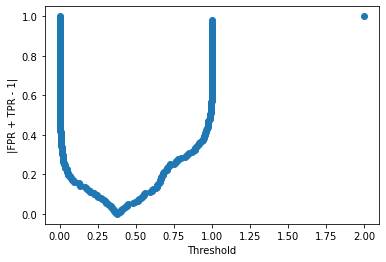

0.37551484


In [ ]:
plot_fprtpr_vs_th(results_divST[1], y_test)

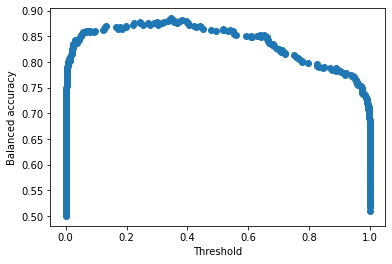

0.34446114


In [ ]:
plot_acc_vs_th(results_divST[1], y_test)

##### Reporte de clasificación

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, results_divST['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_divST = confusion_matrix(y_test, results_divST['Violence'].values,)
print(cfm_divST)

              precision    recall  f1-score   support

 No violence       0.84      0.90      0.87       200
    Violence       0.89      0.83      0.86       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

[[179  21]
 [ 34 166]]


In [ ]:
th_divST = 0.37551484
results_divST['NoViolence'] = results_divST[1] < th_divST
results_divST['Violence'] = results_divST[1] >= th_divST

# Reporte de clasificación
print(classification_report(y_test, results_divST['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_divST = confusion_matrix(y_test, results_divST['Violence'].values,)
print(cfm_divST)

              precision    recall  f1-score   support

 No violence       0.88      0.88      0.88       200
    Violence       0.88      0.88      0.88       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[176  24]
 [ 24 176]]


In [ ]:
th_divST = 0.34446114
results_divST['NoViolence'] = results_divST[1] < th_divST
results_divST['Violence'] = results_divST[1] >= th_divST

# Reporte de clasificación
print(classification_report(y_test, results_divST['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_divST = confusion_matrix(y_test, results_divST['Violence'].values,)
print(cfm_divST)

              precision    recall  f1-score   support

 No violence       0.90      0.87      0.88       200
    Violence       0.87      0.90      0.89       200

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.88       400
weighted avg       0.89      0.89      0.88       400

[[174  26]
 [ 20 180]]


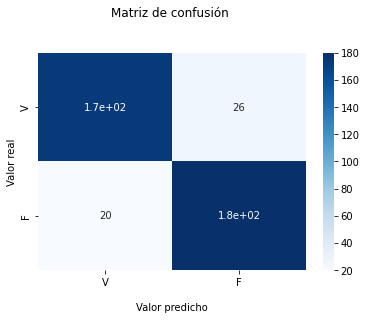

In [ ]:
plot_CFM(cfm_divST)

#### Atención ST Unida

In [ ]:
!python tools/analysis/analyze_logs.py plot_curve \
  work_dirs/timesformer_joinST/None.log.json --keys loss_cls top1_acc --out timesformer_joinST.png

plot curve of work_dirs/timesformer_joinST/None.log.json, metric is loss_cls
plot curve of work_dirs/timesformer_joinST/None.log.json, metric is top1_acc
save curve to: timesformer_joinST.png


In [ ]:
!python tools/analysis/analyze_logs.py cal_train_time \
  work_dirs/timesformer_joinST/None.log.json

-----Analyze train time of work_dirs/timesformer_joinST/None.log.json-----
slowest epoch 37, average time is 0.2469
fastest epoch 28, average time is 0.2454
time std over epochs is 0.0005
average iter time: 0.2460 s/iter



In [ ]:
!python tools/analysis/get_flops.py configs/recognition/timesformer/config_joinST.py --shape 1 3 8 224 224

2022-06-02 11:46:00,939 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth
load checkpoint from http path: https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth
2022-06-02 11:46:01,427 - mmaction - WARNING - The model and loaded state dict do not match exactly

missing keys in source state_dict: time_embed

Recognizer3D(
  57.3 M, 66.778% Params, 89.828 GFLOPs, 100.000% FLOPs, 
  (backbone): TimeSformer(
    57.298 M, 66.776% Params, 89.828 GFLOPs, 100.000% FLOPs, 
    (patch_embed): PatchEmbed(
      0.591 M, 0.688% Params, 0.926 GFLOPs, 1.031% FLOPs, 
      (projection): Conv2d(0.591 M, 0.688% Params, 0.926 GFLOPs, 1.031% FLOPs, 3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (drop_after_pos): Dropout(0.0 M, 0.000% Params, 0.0 GFLOPs, 0.000% FLOPs, p=0.0, inplace=False)
    (drop_after_time): Dropout(0.0 M, 0.000% Params, 0.0 GFLOPs, 0.000% FLOPs, p=0.0, inplace=Fals

##### Determinación del valor de Treshold

In [ ]:
results_joinST = pd.DataFrame(outputs_joinST)

In [ ]:
th_joinST = 0.5
results_joinST['NoViolence'] = results_joinST[1] < th_joinST
results_joinST['Violence'] = results_joinST[1] >= th_joinST
results_joinST

,0,1,NoViolence,Violence
0,0.999577,0.000423,True,False
1,0.000003,0.999997,False,True
2,0.966431,0.033570,True,False
3,0.000056,0.999944,False,True
4,0.246925,0.753075,False,True
...,...,...,...,...
395,0.999894,0.000106,True,False
396,0.784655,0.215345,True,False
397,0.890550,0.109450,True,False
398,0.997709,0.002291,True,False


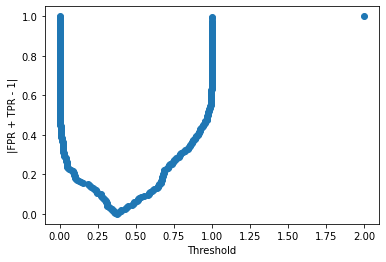

0.37378556


In [ ]:
plot_fprtpr_vs_th(results_joinST[1], y_test)

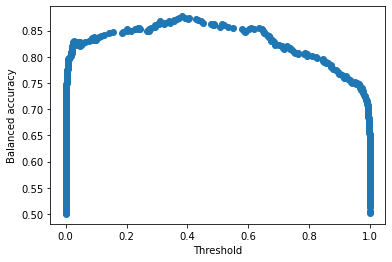

0.38379157


In [ ]:
plot_acc_vs_th(results_joinST[1], y_test)

##### Reporte de clasificación 

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, results_joinST['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_joinST = confusion_matrix(y_test, results_joinST['Violence'].values,)
print(cfm_joinST)

              precision    recall  f1-score   support

 No violence       0.84      0.89      0.86       200
    Violence       0.88      0.82      0.85       200

    accuracy                           0.86       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.86      0.86      0.86       400

[[178  22]
 [ 35 165]]


In [ ]:
th_joinST = 0.37378556
results_joinST['NoViolence'] = results_joinST[1] < th_joinST
results_joinST['Violence'] = results_joinST[1] >= th_joinST

# Reporte de clasificación
print(classification_report(y_test, results_joinST['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_joinST = confusion_matrix(y_test, results_joinST['Violence'].values,)
print(cfm_joinST)

              precision    recall  f1-score   support

 No violence       0.88      0.88      0.88       200
    Violence       0.88      0.88      0.88       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[175  25]
 [ 25 175]]


In [ ]:
th_joinST = 0.38379157
results_joinST['NoViolence'] = results_joinST[1] < th_joinST
results_joinST['Violence'] = results_joinST[1] >= th_joinST

# Reporte de clasificación
print(classification_report(y_test, results_joinST['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_joinST = confusion_matrix(y_test, results_joinST['Violence'].values,)
print(cfm_joinST)

              precision    recall  f1-score   support

 No violence       0.88      0.88      0.88       200
    Violence       0.88      0.88      0.88       200

    accuracy                           0.88       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.88      0.88      0.88       400

[[176  24]
 [ 25 175]]


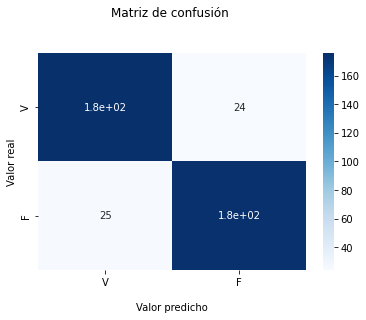

In [ ]:
plot_CFM(cfm_joinST)

#### Atención espacial

In [ ]:
!python tools/analysis/analyze_logs.py plot_curve \
  work_dirs/timesformer_spaceOnly/None.log.json --keys loss_cls top1_acc --out timesformer_spaceOnly.png

plot curve of work_dirs/timesformer_spaceOnly/None.log.json, metric is loss_cls
plot curve of work_dirs/timesformer_spaceOnly/None.log.json, metric is top1_acc
save curve to: timesformer_spaceOnly.png


In [ ]:
!python tools/analysis/analyze_logs.py cal_train_time \
  work_dirs/timesformer_spaceOnly/None.log.json

-----Analyze train time of work_dirs/timesformer_spaceOnly/None.log.json-----
slowest epoch 23, average time is 0.1738
fastest epoch 16, average time is 0.1721
time std over epochs is 0.0003
average iter time: 0.1727 s/iter



In [ ]:
!python tools/analysis/get_flops.py configs/recognition/timesformer/config_spaceOnly.py --shape 1 3 8 224 224

2022-06-02 11:47:16,267 - mmaction - INFO - load model from: https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth
load checkpoint from http path: https://download.openmmlab.com/mmaction/recognition/timesformer/vit_base_patch16_224.pth
Recognizer3D(
  57.3 M, 66.783% Params, 90.222 GFLOPs, 100.000% FLOPs, 
  (backbone): TimeSformer(
    57.298 M, 66.781% Params, 90.222 GFLOPs, 100.000% FLOPs, 
    (patch_embed): PatchEmbed(
      0.591 M, 0.688% Params, 0.926 GFLOPs, 1.026% FLOPs, 
      (projection): Conv2d(0.591 M, 0.688% Params, 0.926 GFLOPs, 1.026% FLOPs, 3, 768, kernel_size=(16, 16), stride=(16, 16))
    )
    (drop_after_pos): Dropout(0.0 M, 0.000% Params, 0.0 GFLOPs, 0.000% FLOPs, p=0.0, inplace=False)
    (norm): LayerNorm(0.002 M, 0.002% Params, 0.0 GFLOPs, 0.000% FLOPs, (768,), eps=1e-06, elementwise_affine=True)
    (transformer_layers): TransformerLayerSequence(
      56.706 M, 66.091% Params, 89.296 GFLOPs, 98.973% FLOPs, 
      (layers):

##### Determinación del valor de Treshold

In [ ]:
results_spaceOnly = pd.DataFrame(outputs_spaceOnly)

In [ ]:
th_spaceOnly = 0.5
results_spaceOnly['NoViolence'] = results_spaceOnly[1] < th_spaceOnly
results_spaceOnly['Violence'] = results_spaceOnly[1] >= th_spaceOnly
results_spaceOnly

,0,1,NoViolence,Violence
0,9.999741e-01,2.588794e-05,True,False
1,1.316594e-07,9.999999e-01,False,True
2,9.061483e-01,9.385180e-02,True,False
3,3.972986e-06,9.999961e-01,False,True
4,8.608183e-01,1.391817e-01,True,False
...,...,...,...,...
395,9.999990e-01,9.623736e-07,True,False
396,9.627385e-01,3.726159e-02,True,False
397,9.873773e-01,1.262268e-02,True,False
398,3.056440e-01,6.943561e-01,False,True


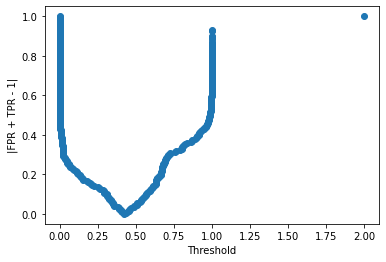

0.42469275


In [ ]:
plot_fprtpr_vs_th(results_spaceOnly[1], y_test)

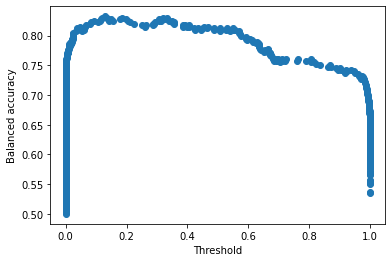

0.13026065


In [ ]:
plot_acc_vs_th(results_spaceOnly[1], y_test)

##### Reporte de clasificación 

In [ ]:
# Reporte de clasificación
print(classification_report(y_test, results_spaceOnly['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_spaceOnly = confusion_matrix(y_test, results_spaceOnly['Violence'].values,)
print(cfm_spaceOnly)

              precision    recall  f1-score   support

 No violence       0.80      0.83      0.82       200
    Violence       0.83      0.79      0.81       200

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

[[167  33]
 [ 42 158]]


In [ ]:
th_spaceOnly = 0.42469275
results_spaceOnly['NoViolence'] = results_spaceOnly[1] < th_spaceOnly
results_spaceOnly['Violence'] = results_spaceOnly[1] >= th_spaceOnly

# Reporte de clasificación
print(classification_report(y_test, results_spaceOnly['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_spaceOnly = confusion_matrix(y_test, results_spaceOnly['Violence'].values,)
print(cfm_spaceOnly)

              precision    recall  f1-score   support

 No violence       0.81      0.81      0.81       200
    Violence       0.81      0.81      0.81       200

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.81      0.81      0.81       400

[[162  38]
 [ 38 162]]


In [ ]:
th_spaceOnly = 0.13026065
results_spaceOnly['NoViolence'] = results_spaceOnly[1] < th_spaceOnly
results_spaceOnly['Violence'] = results_spaceOnly[1] >= th_spaceOnly

# Reporte de clasificación
print(classification_report(y_test, results_spaceOnly['Violence'].values, target_names=labels))

# Calcular la matriz de confusión
cfm_spaceOnly = confusion_matrix(y_test, results_spaceOnly['Violence'].values,)
print(cfm_spaceOnly)

              precision    recall  f1-score   support

 No violence       0.91      0.73      0.81       200
    Violence       0.78      0.93      0.85       200

    accuracy                           0.83       400
   macro avg       0.85      0.83      0.83       400
weighted avg       0.85      0.83      0.83       400

[[147  53]
 [ 14 186]]


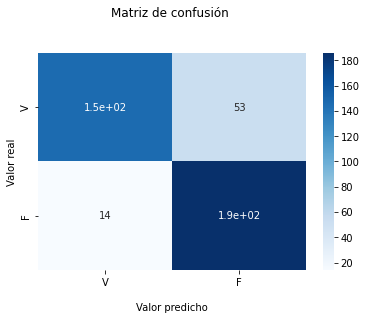

In [ ]:
plot_CFM(cfm_spaceOnly)

## Exportar el modelo a ONXX y verificar su estructura

In [ ]:
!python tools/deployment/pytorch2onnx.py configs/recognition/timesformer/config_divST.py \
 work_dirs/timesformer_divST/best_mean_class_accuracy_epoch_15.pth --shape 1 1 3 8 224 224

load checkpoint from local path: work_dirs/timesformer_divST/best_mean_class_accuracy_epoch_15.pth
/usr/local/lib/python3.7/dist-packages/mmcv/onnx/symbolic.py:481: UserWarning: DeprecationWarning: This function will be deprecated in future. Welcome to use the unified model deployment toolbox MMDeploy: https://github.com/open-mmlab/mmdeploy
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /pytorch/aten/src/ATen/native/BinaryOps.cpp:467.)
  return torch.floor_divide(self, other)
/usr/local/lib/python3.7/dist-packages/einops/einops.py:314: TracerWarning: Converting a te

In [ ]:
import onnx
# Carga el modelo
model = onnx.load("tmp.onnx")

# Verificar si el modelo está bien formado
onnx.checker.check_model(model)

# Se imprime una representación del grafo
print(onnx.helper.printable_graph(model.graph))

graph torch-jit-export (
  %0[FLOAT, 1x1x3x8x224x224]
) optional inputs with matching initializers (
  %backbone.cls_token[FLOAT, 1x1x768]
  %backbone.pos_embed[FLOAT, 1x197x768]
  %backbone.time_embed[FLOAT, 1x8x768]
  %backbone.patch_embed.projection.weight[FLOAT, 768x3x16x16]
  %backbone.patch_embed.projection.bias[FLOAT, 768]
  %backbone.norm.weight[FLOAT, 768]
  %backbone.norm.bias[FLOAT, 768]
  %backbone.transformer_layers.layers.0.attentions.0.norm.weight[FLOAT, 768]
  %backbone.transformer_layers.layers.0.attentions.0.norm.bias[FLOAT, 768]
  %backbone.transformer_layers.layers.0.attentions.0.attn.in_proj_bias[FLOAT, 2304]
  %backbone.transformer_layers.layers.0.attentions.0.attn.out_proj.bias[FLOAT, 768]
  %backbone.transformer_layers.layers.0.attentions.0.temporal_fc.bias[FLOAT, 768]
  %backbone.transformer_layers.layers.0.attentions.1.norm.weight[FLOAT, 768]
  %backbone.transformer_layers.layers.0.attentions.1.norm.bias[FLOAT, 768]
  %backbone.transformer_layers.layers.0.atte